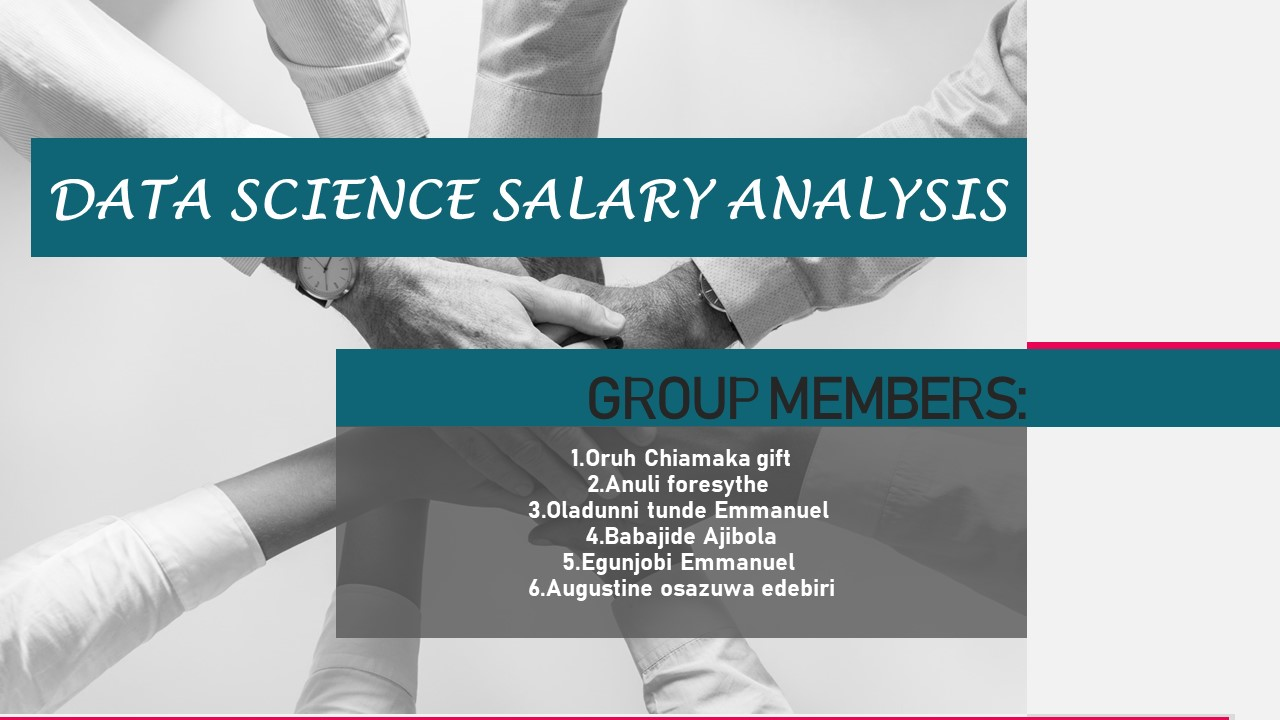

#### 1.How much are you worth as a Data Scientist?
#### 2.Can we predict the salary of a data scientist based on their experience, location or other factors?
## Let's find out!!

# Analysis Overview
   This is a detailed analysis comparing salaries of workers in Data Science field and the analysis will be used foreducational purposes.The proper understainding of the data set, **below is the Data Dictionary:**
          
    Work_year:Represents the specific year of salary data collection.(2020-2022)
    Experience_level: Represents the level of work experience of the employees.
                      (Entry-Level), EX (Experienced), MI (Mid-Level), and SE (Senior).
    Employment_type: Indicates the type of employment for the employees. It is
                     labelled as FT (Full-Time), CT (Contract), FL (Freelancer), and PT (Part-Time).
    Job_title: Contains the job titles of the employees.such as"Data Quality
                     Analyst", etc.
    Salary:This column provides information about the salaries earned by the
            employees.
    Salary_currency:It provides information about the currency in which the
                     salaries are denoted.
    Salary_in_usd: Contains the converted salary figures in USD for uniform
                  comparison.
    Company_location: Indicates the location of the companies where the
                 employees work. (NG:'Nigeria, US:'United Stated')
    Employee_residence:It provides the location the employes resides

    Company_size: Represents the size of the companies where the employees
              work.(e.g:'Large' 'Medium' 'Small')
    Remot_ratio:The overall amount of work done remotely
                  0:  No remote work (less than 20%)
                  50: partially remote        
                  100:Fully remote(more than 80%)

# OBJECTIVE Of The Analysis

    The purpose of this analysis is to comprehensively examine a multitude of factors and their intricate interconnections 
    with the aim of precisely predicting salary outcomes. 

    This study endeavors to provide invaluable insights into the current salary trajectories in the domain of data science,         whilst simultaneously establishing a robust foundation for future explorations into the influence of key determinants 
    such as:
         experience level, employment type, company size, and geographical location on wage structures within the rapidly envolving proffession.

### For adequate and accurate results, the given dataset will be analyse in different stages and this stages/processes will be doccumented during the course of the analysis:
  ##### Data Preprocessing:
        Load the dataset into the notebook,
        Ensure the dataset is cleaned and ready for analysis,
        Import the necessarily libraryetc
  
  ##### Exploratory Data Analysis:
            Use libraries like Matplotlib and Seaborn to create various types of plots
            (e.g., histograms, scatter plots, bar plots, etc).
            Practice customizing the visualizations to improve readability and convey insights effectively.ETC
            
  ##### Data Transformation: 
         Standardize the numerical features.
          Encode the categorical features
          Use correlation matrices or heatmaps to identify correlations between numerical attributes, etc
Details of the process will be docummented during the course of the analysis

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sb

In [2]:
df=pd.read_csv('Data Science Salaries.csv')
df

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [4]:
#To call out each unique columns
print(df.columns)

Index(['id', 'work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [5]:
#To get an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


The dataset has 607 rows and a total of 10 columns

In [6]:
df.shape

(607, 12)

In [7]:
# Replacing employment type abbreviation to full meaning--using the replace function
df.replace({'employment_type':{ 'FT': 'Full Time','PT': 'Part Time', 'CT': 'Contract',
             'FL': 'Freelance'}}, inplace=True)

In [8]:
df.replace({'experience_level': {
    'MI': 'Mid-level',
    'SE': 'Senior',
    'EN': 'Entry Level',
    'EX': 'Experienced'
}}, inplace=True)

In [9]:
df.replace({'company_size': {
    'L': 'Large',
    'S': 'Small',
    'M': 'Medium'
}}, inplace=True)

In [10]:
df.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Mid-level,Full Time,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,1,2020,Senior,Full Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2,2020,Senior,Full Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,3,2020,Mid-level,Full Time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,4,2020,Senior,Full Time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large


In [11]:
# Using the *drop* function to delete unwanted columns
df.drop(columns=['id','salary'], inplace=True)


In [12]:
#checking for null values,using the *isnull* function
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There is no 'null values' in the dataset

In [13]:
# checking for duplicates in the dataset
df.duplicated().sum()

42

In [14]:
#dropping the duplicated rows
df.drop_duplicates(inplace=True)

In [15]:
#using the "astype" function to change datatypes
df['experience_level']=df['experience_level'].astype('category')
df['company_size']=df['company_size'].astype('category')
df['employment_type']=df['employment_type'].astype('category')
df.dtypes

work_year                int64
experience_level      category
employment_type       category
job_title               object
salary_currency         object
salary_in_usd            int64
employee_residence      object
remote_ratio             int64
company_location        object
company_size          category
dtype: object

In [16]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,565.000000,565.000000,565.000000
mean,2021.364602,110610.343363,69.911504
std,0.698138,72280.702792,40.900666
min,2020.000000,2859.000000,0.000000
25%,2021.000000,60757.000000,50.000000
50%,2021.000000,100000.000000,100.000000
75%,2022.000000,150000.000000,100.000000
max,2022.000000,600000.000000,100.000000


The stipulated work_year is from 2020-2021
There is a positive distribution in salaries over the course of 3 years,hence the slight closeness between the mean and mean

## Data Exploration and Vizualization

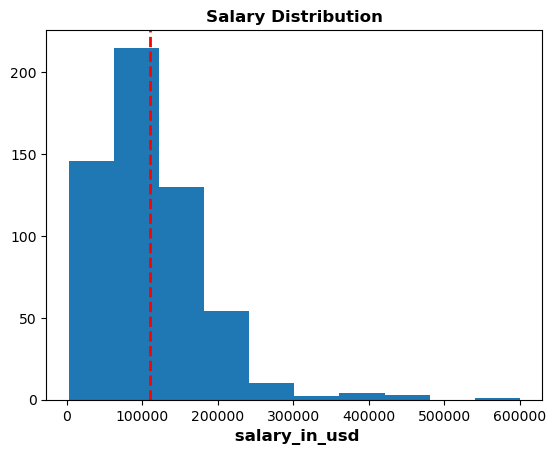

In [17]:
plt.hist(df['salary_in_usd'])
plt.axvline(df['salary_in_usd'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Salary')
plt.title('Salary Distribution',fontsize=12, fontweight='bold')
plt.xlabel(' salary_in_usd',fontsize=12, fontweight='bold')
plt.show()

The plot above shows that the salary is around the mean but majorly below the mean

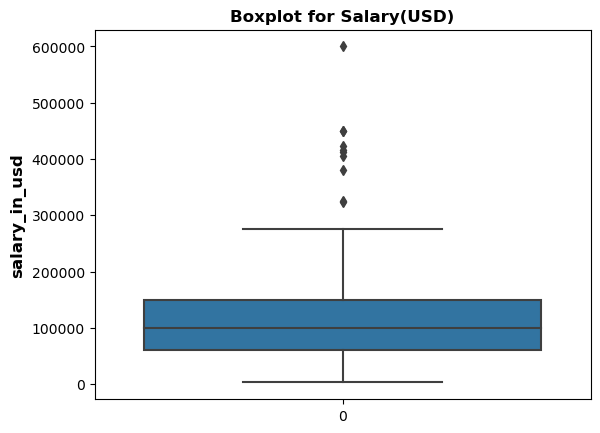

In [20]:
sb.boxplot(df['salary_in_usd'])#To check for outliers
plt.title('Boxplot for Salary(USD)',fontsize=12, fontweight='bold')
plt.ylabel('salary_in_usd',fontsize=12, fontweight='bold')
plt.show()

There is the presence of outliers from 300,000 and above 

In [21]:
#To categorize the columns for further analysis
cat_features=df.select_dtypes('category')
cat_features

,experience_level,employment_type,company_size
0,Mid-level,Full Time,Large
1,Senior,Full Time,Small
2,Senior,Full Time,Medium
3,Mid-level,Full Time,Small
4,Senior,Full Time,Large
...,...,...,...
602,Senior,Full Time,Medium
603,Senior,Full Time,Medium
604,Senior,Full Time,Medium
605,Senior,Full Time,Medium


In [22]:
#To categorize the columns for further analysis
obj_features=df.select_dtypes('object')
obj_features

,job_title,salary_currency,employee_residence,company_location
0,Data Scientist,EUR,DE,DE
1,Machine Learning Scientist,USD,JP,JP
2,Big Data Engineer,GBP,GB,GB
3,Product Data Analyst,USD,HN,HN
4,Machine Learning Engineer,USD,US,US
...,...,...,...,...
602,Data Engineer,USD,US,US
603,Data Engineer,USD,US,US
604,Data Analyst,USD,US,US
605,Data Analyst,USD,US,US


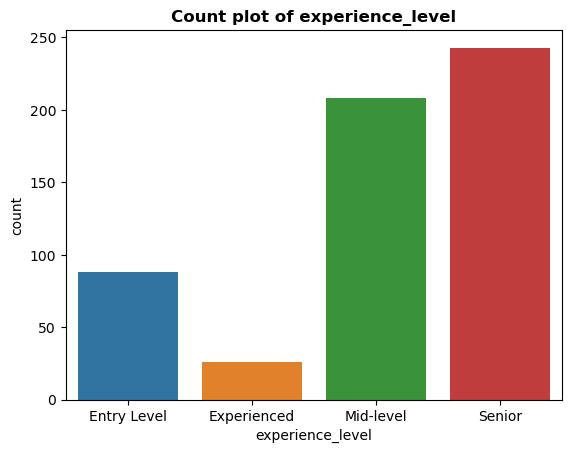

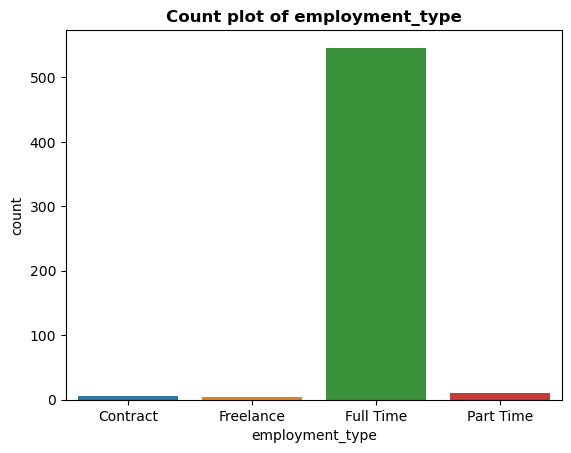

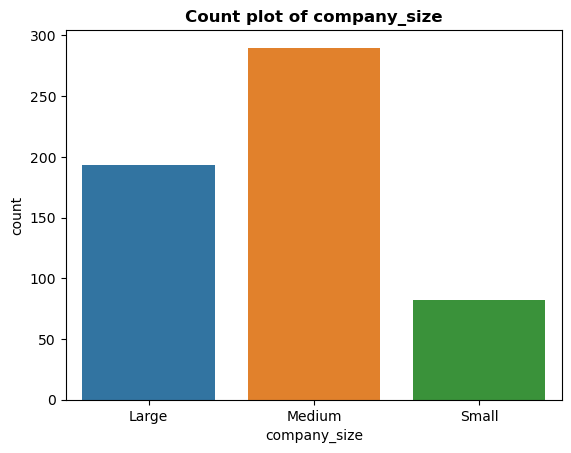

In [23]:
# using the "for loop" function to loop through different columns at the same time 
for col in cat_features:
    sb.countplot(x=col, data=df)
    plt.title(f'Count plot of {col}',fontsize=12, fontweight='bold')
    plt.show()

In [24]:
# Aplying the "groupby" function for yearly average salaries
yearly_avg_salaries = df.groupby('work_year')['salary_in_usd'].mean()
yearly_avg_salaries

work_year
2020     95813.000000
2021     99430.413953
2022    123089.097122
Name: salary_in_usd, dtype: float64

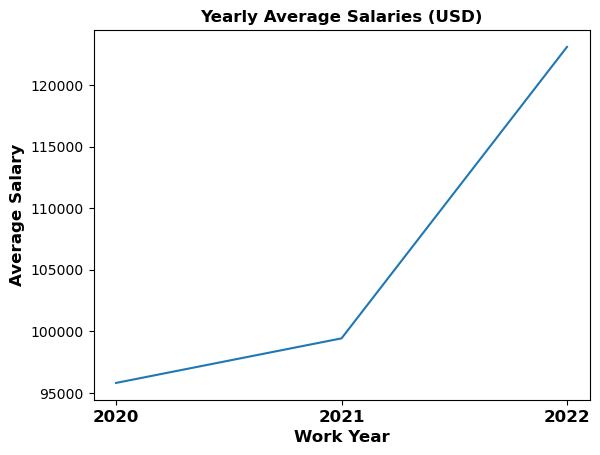

In [25]:
#To plot and vizualize the result of the groupby function
plt.plot(yearly_avg_salaries.index, yearly_avg_salaries.values)
plt.xlabel('Work Year',fontsize=12, fontweight='bold') # Add labels and title
plt.ylabel('Average Salary',fontsize=12, fontweight='bold')
plt.xticks(yearly_avg_salaries.index,fontsize=12, fontweight='bold')
plt.title('Yearly Average Salaries (USD)',fontsize=12, fontweight='bold')
plt.show()

From the plot, it is visible that there an increase in salary, especially from 2022 and its peak in 2023

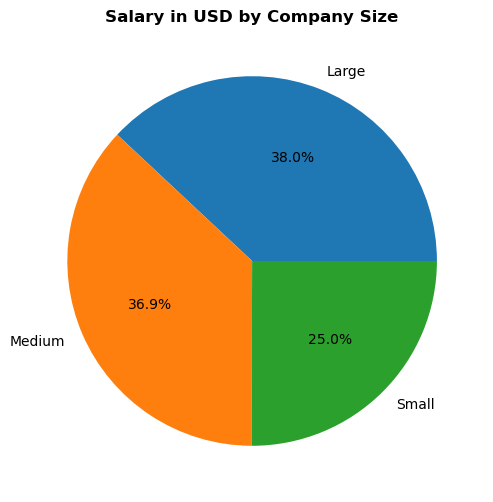

In [26]:
#To get the company size and their salary percentage
company_size_counts = df['company_size'].value_counts()
salary_in_usd_by_company_size = df.groupby('company_size')['salary_in_usd'].mean()

plt.figure(figsize=(10, 6))
plt.pie(salary_in_usd_by_company_size, labels=salary_in_usd_by_company_size.index, autopct="%1.1f%%")
plt.title('Salary in USD by Company Size',fontsize=12, fontweight='bold')
plt.show()

The plot shows that the company size(large) has the highest salary percentage(38%)

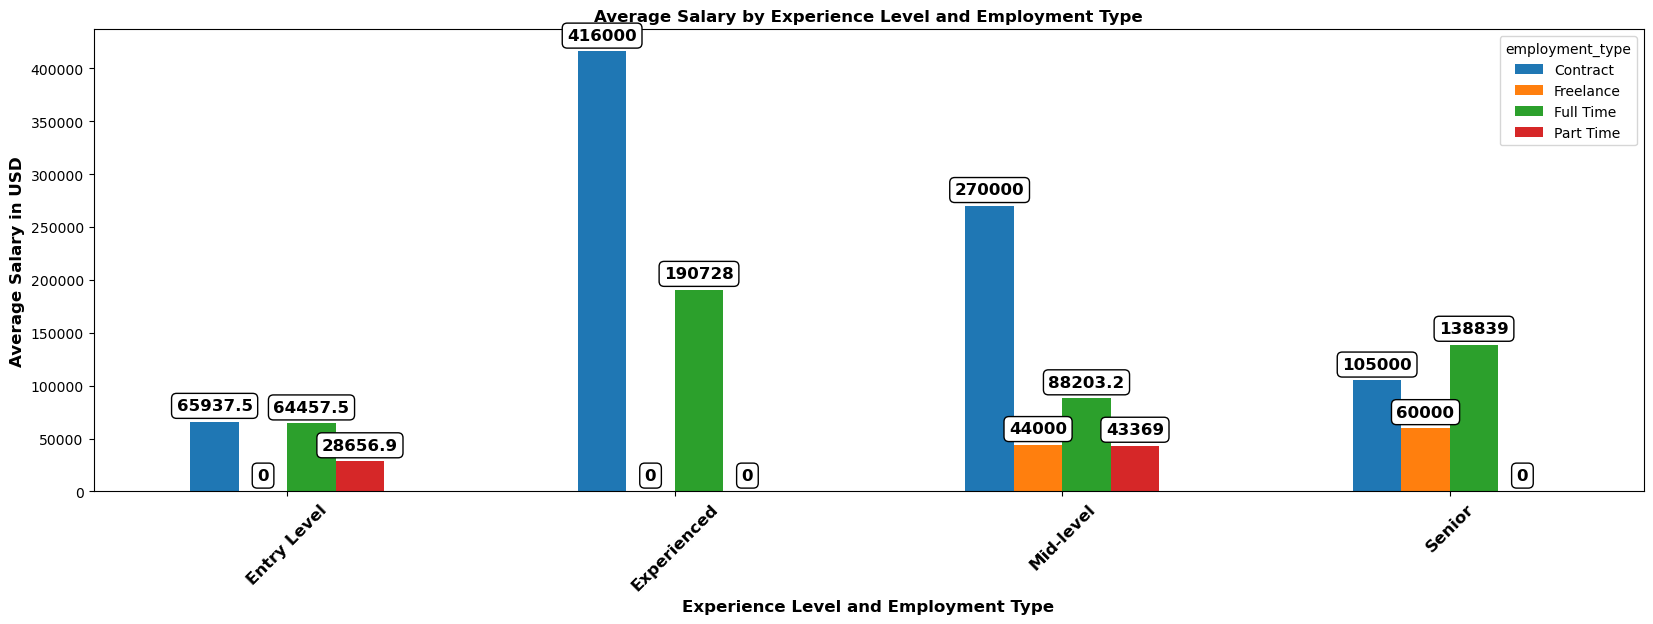

In [27]:
#Average Salary by Experience Level and Employment Type

# 1:Group the data by experience level and employment type
grouped_data = df.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().unstack()

#2:To Create a bar chart
fig, ax = plt.subplots(figsize=(20, 6))
grouped_data.plot.bar(ax=ax)
plt.xlabel('Experience Level and Employment Type',fontsize=12, fontweight='bold') # Add labels and title
plt.ylabel('Average Salary in USD',fontsize=12, fontweight='bold')
plt.title('Average Salary by Experience Level and Employment Type',fontsize=12, fontweight='bold')

#To call out the figures of each level
for container in ax.containers:
    ax.bar_label(container, label_type="edge", color="black",
                 padding=6,
                 fontweight='bold',
                 fontsize=12,
                 bbox={'boxstyle': 'round,pad=0.3', 'facecolor': 'white', 'edgecolor': 'black'})

plt.xticks(rotation=45,fontsize=12, fontweight='bold')
plt.show()

From the plot, the contract staffs with experienced level have the highest average salary(416,000),
   followed by the contract staffs with the mid-level(270,000) and the least been the part-time staffs with entry-level

In [28]:
#To calculate the average mean and group them by job_title(Top 10) to print them out
grouped_df = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)[:10]
grouped_df

job_title
Data Analytics Lead         405000.000000
Principal Data Engineer     328333.333333
Financial Data Analyst      275000.000000
Principal Data Scientist    215242.428571
Director of Data Science    195074.000000
Data Architect              177873.909091
Applied Data Scientist      175655.000000
Analytics Engineer          175000.000000
Data Specialist             165000.000000
Head of Data                160162.600000
Name: salary_in_usd, dtype: float64

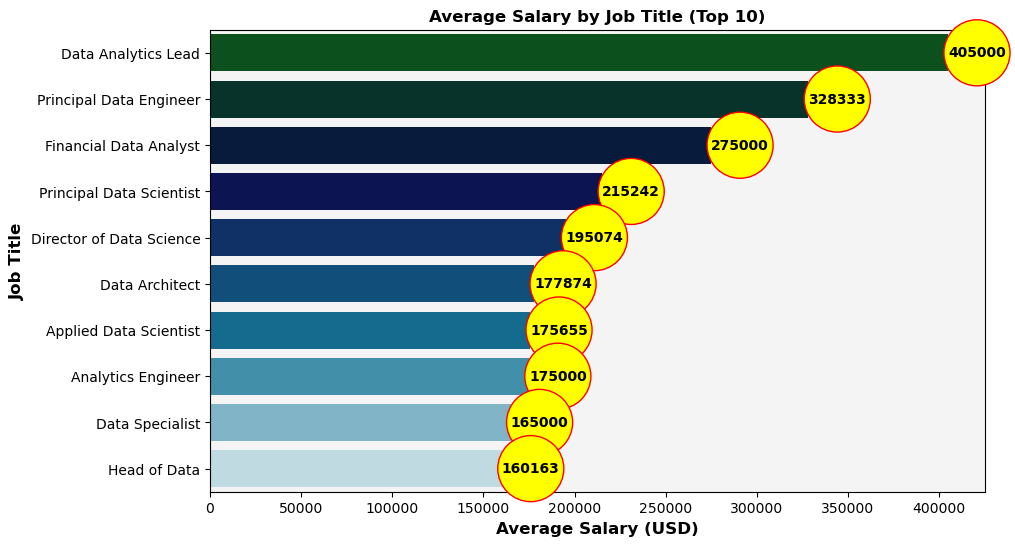

In [30]:
# Group data by 'job_title' and calculate the average salary for each title
job_title_salary= df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False)

plt.figure(figsize = (10,6))
p = sb.barplot(x= job_title_salary.values[:10], y = job_title_salary.index[:10,],palette='ocean')

plt.title('Average Salary by Job Title (Top 10)', fontsize=12, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')

#To call out figures of eact job title
for container in p.containers:
    p.bar_label(container,

                bbox = {'boxstyle': 'circle', 'facecolor': 'yellow', 'edgecolor': 'red'},
                fontweight = 'bold')

# Customize the background color
p.set_facecolor("#f4f4f4")

plt.show()

The job_title with the highest paying average salary is "Data Analytics Lead"

In [31]:
#To vizualize Top 8 location by Top 5 job titles and print them out
top_8_location = df['company_location'].value_counts().head(8)
top_8_location

company_location
US    318
GB     46
CA     28
DE     27
IN     24
FR     15
ES     14
GR     10
Name: count, dtype: int64

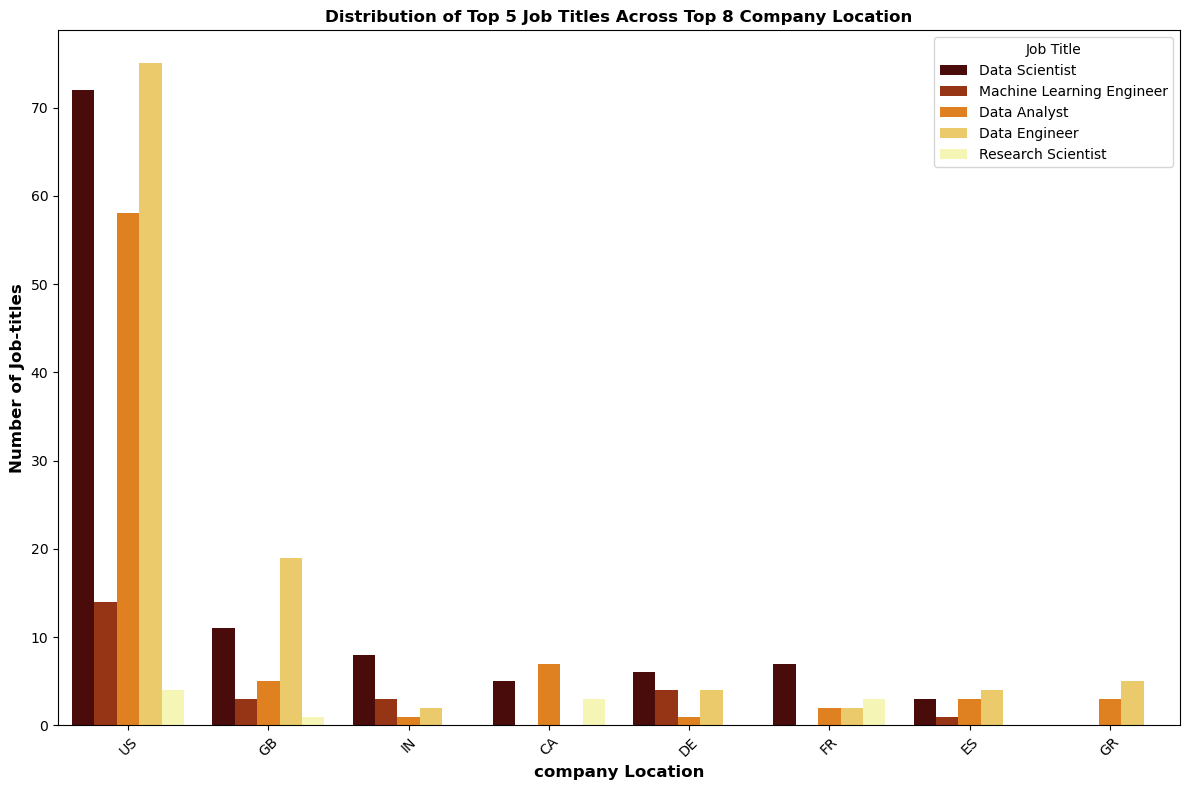

In [32]:
# Define/get the top 8 company location
top_8_location = ['US', 'GB', 'IN', 'CA', 'DE', 'FR', 'ES', 'GR']

# Get the top 5 job titles
top_5_job_titles = df['job_title'].value_counts().head(5).index.tolist()

# Filter the dataset to include only the top 5 job titles and the specified top 8 employee residences
df_filtered = df[df['job_title'].isin(top_5_job_titles) & df['company_location'].isin(top_8_location)]

# Plot the distribution of each job title across comapny location
plt.figure(figsize=(12, 8))
sb.countplot(x='company_location', hue='job_title', data=df_filtered, order=top_8_location, palette='afmhot')
plt.title('Distribution of Top 5 Job Titles Across Top 8 Company Location',fontsize=12, fontweight='bold')
plt.xlabel('company Location',fontsize=12, fontweight='bold')
plt.ylabel('Number of Job-titles',fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Job Title')
plt.tight_layout()
plt.show()

The United States has the most job tiltles followed by Great-Britain

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


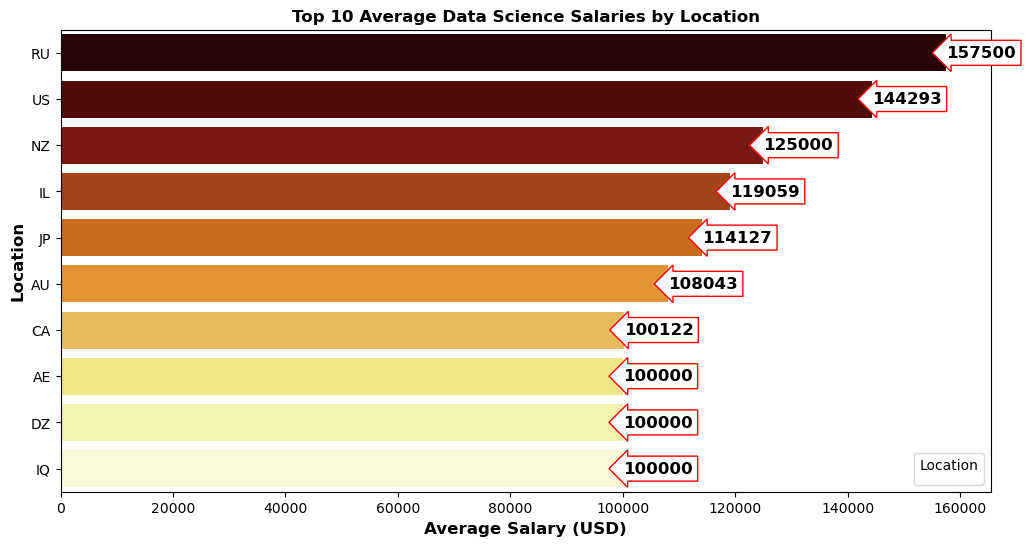

In [37]:
#To get the average salary in different locations(Top 10)

# 1: Group the data by company_location and calculate the mean salary for each location
average_salaries_by_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# 2: Sort the locations by average salary in descending order
average_salaries_by_location = average_salaries_by_location.sort_values(by='salary_in_usd', ascending=False)

# 3: Select the top N locations to plot
top_n_locations = 10 

# 4: Create a bar chart to visualize average salaries by country
plt.figure(figsize=(12, 6))
p = sb.barplot(x='salary_in_usd', y='company_location', data=average_salaries_by_location.head(top_n_locations), palette = 'afmhot')
plt.title('Top {} Average Data Science Salaries by Location'.format(top_n_locations), fontsize=12, fontweight='bold' )
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Location', fontsize=12, fontweight='bold')
plt.legend(title='Location')

for container in p.containers:
    p.bar_label(container,
                fontsize = 12,
                bbox = {'boxstyle': 'larrow', 'edgecolor': 'red', 'facecolor': 'white'},
                label_type="edge",
                fontweight = 'bold'
               )

# Customize the background color
ax.set_facecolor("#f4f4f4")
plt.show()

In respect to the top ten location with the hihest average salary, Russia toped with 157,500
  Followed by United States and the list is Canada(99,823) USD

In [38]:
#To define average salaries in each year by employment type using the "groupby function" and print them out
grouped_workyear_data = df.groupby(['work_year', 'employment_type'])['salary_in_usd'].mean().unstack()
grouped_workyear_data

employment_type,Contract,Freelance,Full Time,Part Time
work_year,,,,
2020,100000.000000,60000.0,98542.661765,18817.500000
2021,263666.666667,16000.0,100080.519608,23018.833333
2022,31875.000000,100000.0,123839.186131,77478.500000


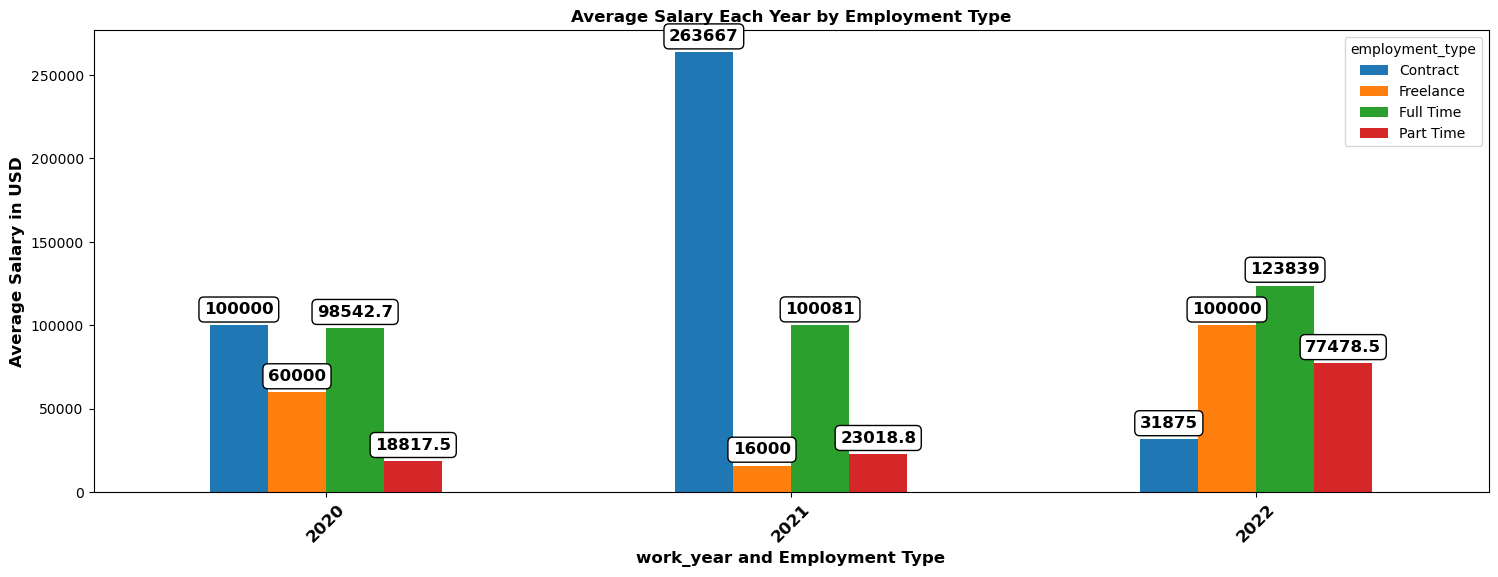

In [39]:
#To fix and plot the results
fig, ax = plt.subplots(figsize=(18, 6))
grouped_workyear_data.plot.bar(ax=ax)
plt.xlabel('work_year and Employment Type',fontsize=12, fontweight='bold') # Add labels and title
plt.ylabel('Average Salary in USD',fontsize=12, fontweight='bold')
plt.title('Average Salary Each Year by Employment Type',fontsize=12, fontweight='bold')
plt.xticks(rotation=45,fontsize=12, fontweight='bold')

#To call out figures for Employment type
for container in ax.containers:
    ax.bar_label(container, label_type="edge", color="black",
                 padding=6,
                 fontweight='bold',
                 fontsize=12,
                 bbox={'boxstyle': 'round,pad=0.3', 'facecolor': 'white', 'edgecolor': 'black'})

plt.show()


For year by employment type, the Contract staffs recorded the highest average salary(263,667 USD),
 while in 2022 full-time staffs recorded the highest average salary(125,195 USD)

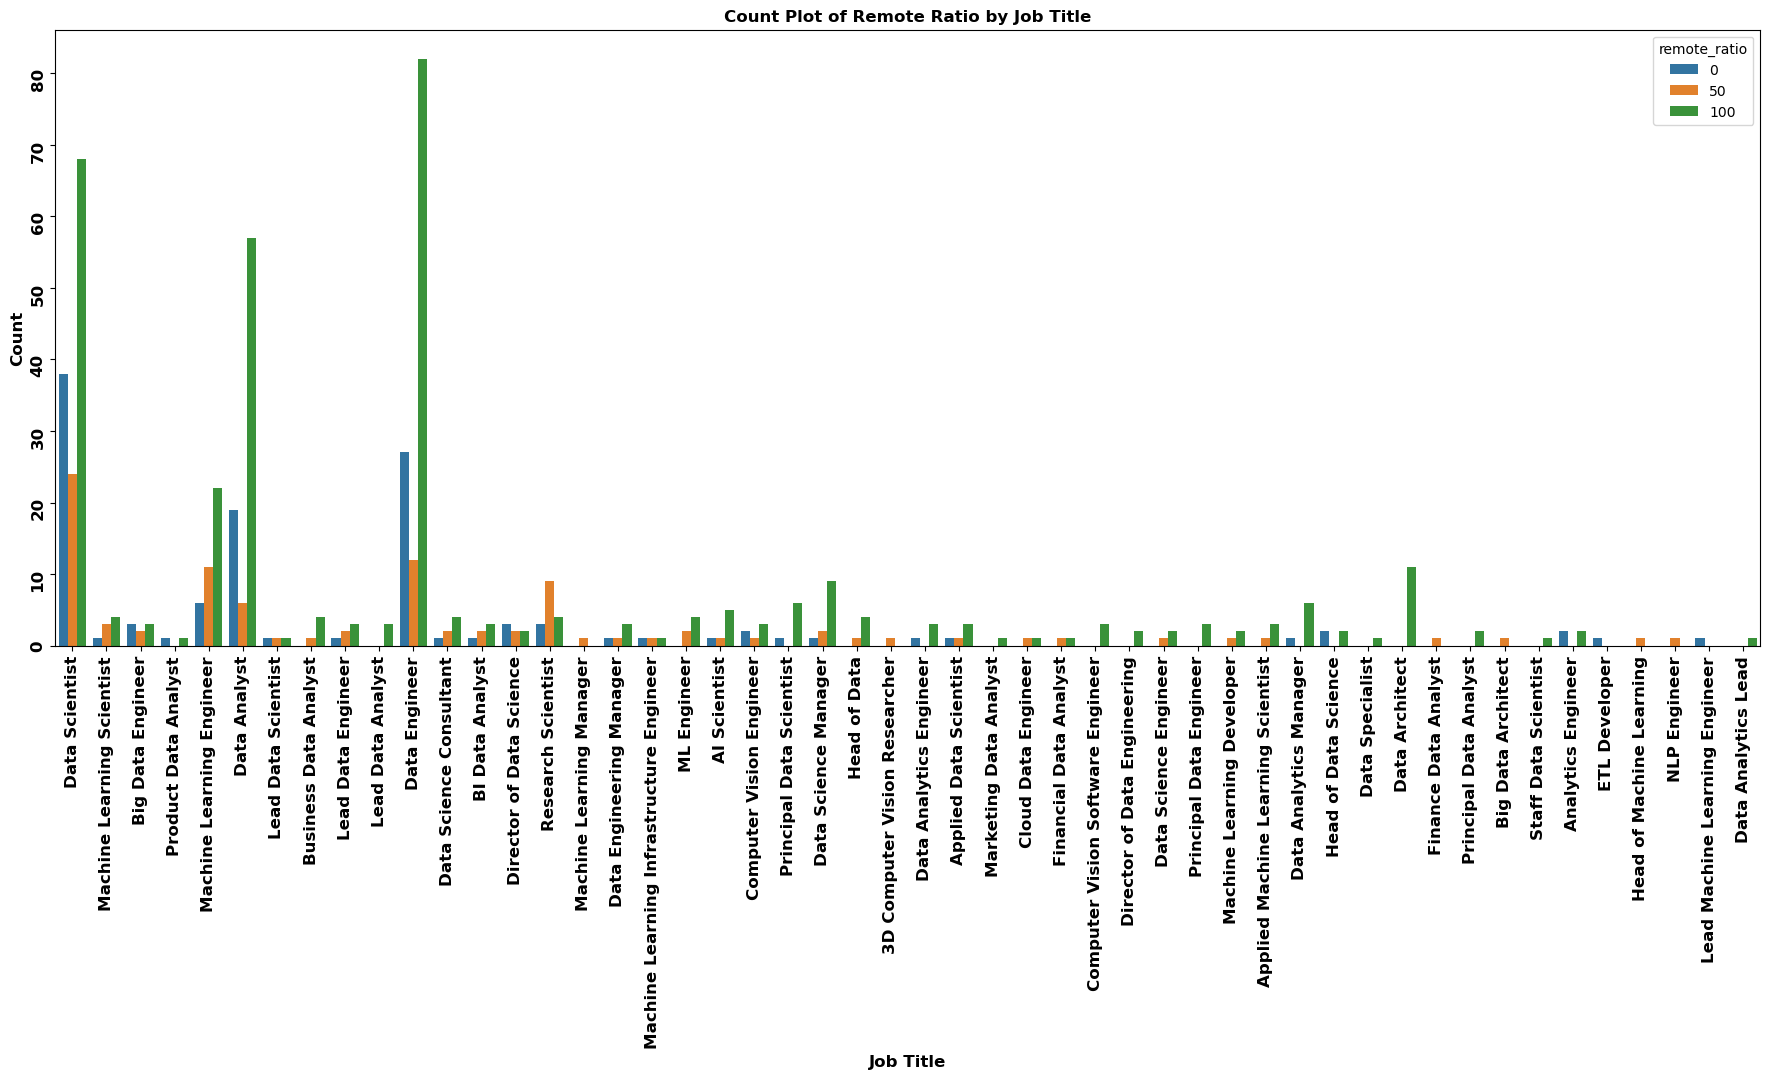

In [40]:
#To get difeerent job titles by their remote ratio
plt.figure(figsize = (22,8)) #increase size to accomate more titles
sb.countplot(x='job_title', hue='remote_ratio', data=df)
plt.xlabel('Job Title',fontsize=12, fontweight='bold') # Add labels and title
plt.ylabel('Count',fontsize=12, fontweight='bold')
plt.title('Count Plot of Remote Ratio by Job Title',fontsize=12, fontweight='bold')
plt.xticks(rotation=90,fontsize=12, fontweight='bold')  # Rotate x-axis labels for better readability
plt.yticks(rotation=90,fontsize=12, fontweight='bold')
plt.show()

knowing that 0:  No remote work (less than 20%)
             50: partially remote        
              100:Fully remote(more than 80%)
Data Engineer job title has the 3 categories but also fully remote,same for Data scientist
 and Data analyst

### CONCLUSION:
Based on the extensive EXPLORATORY DATA ANALYSIS of the data science salaries dataset, several key insights can be drawn:

    1:There is a positive correlation between experience level and salary, with senior-level data scientists earning significantly higher than entry-level professionals.

    2:Employment type also plays a role, with full-time employees typically earning more than their part-time or freelance counterparts.

    3:Company size has a noticeable impact on salaries, with employees in large companies generally earning more than those in small or medium-sized organizations.

    4:Remote work arrangements are becoming increasingly common, with a significant number of data scientists,data analyst data engineer working fully or partially remotely.

    5:The job title also influences salary, with certain roles such as Principal Data Engineer, Financial data analyst and Data Analytics lead are commanding higher average salaries/compensation.

    6:Location plays a crucial role in determining salaries, with Data scientists/Data engineer in countries like the United States and Germany earning substantially more than those in other regions.

### RECOMMENDATIONS:
From the above analysis, here are some recommendations for data scientists looking to maximize their salaries:

    1: To maximize earning potential, data scientists should aim to gain experience and progress to senior-level positions.
    
    2: Full-time employment offers better salary prospects compared to part-time or freelance work.
    
    3: Data scientists seeking higher salaries should consider working for large companies or organizations.

    4: Remote work arrangements can provide flexibility and work-life balance while maintaining competitive salaries.
    
    5: Choosing a high-paying job title such as Principal Data Scientist or Data Analytics Lead can significantly boost earnings.
    
    6:Continuous learning and skill development are essential for staying competitive and increasing earning potential in the rapidly evolving field of data science.








## DATA TRANSFORMATION

### In this analysis, we have chosen to employ a variety of models,
    namely:
     Logistic Regression ,
     RandomForest ,
     and Gradient Boosting Classifier.
     These algorithms are known for their distinct strengths when dealing with diverse data types and structures.

#### Few reasons behind these choices:
   
    1: Handling Non-linearity:Our dataset potentially includes complex and  
             non-linear relationships.models like Random Forest
             and Gradient Boosting Classifier can effectively capture these intricate patterns.

    2:Robustness to Overfitting

    3:Feature Importance

In addition to this, we will import the necessary libaries,
Build the model,evaluate and test our model using the approprate algorithm.



In [41]:
# First,to scale the feature, in other to fix the outliers for proper target/output
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the scaler to the data
scaler.fit(df[['salary_in_usd', 'remote_ratio']])
df[['salary_in_usd', 'remote_ratio']] = scaler.transform(df[['salary_in_usd', 'remote_ratio']])

In [42]:
#To import the neccesary libariers for the analysis
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [43]:
# Use "labelencoder" to code the categorical columns before deploying it to the model 
le=LabelEncoder()

In [44]:
# This process converts all categorical columns into numerical format for further analysis and modeling.
for column in cat_features.columns:
    df[column] = le.fit_transform(df[column])

In [45]:
for column in obj_features.columns:
    df[column] = le.fit_transform(df[column])

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.267000,0.015092,-0.151328,0.174678,0.159326,0.167429,0.058879,0.157108,0.066223
experience_level,0.267000,1.000000,-0.046307,0.037776,0.169835,0.305962,0.200671,0.030381,0.224652,-0.078228
employment_type,0.015092,-0.046307,1.000000,-0.102797,-0.090283,-0.126396,-0.114464,-0.047753,-0.087112,0.034656
job_title,-0.151328,0.037776,-0.102797,1.000000,-0.139405,0.132225,-0.114186,-0.036936,-0.144619,-0.025978
salary_currency,0.174678,0.169835,-0.090283,-0.139405,1.000000,0.414721,0.757361,0.134341,0.788032,0.030280
salary_in_usd,0.159326,0.305962,-0.126396,0.132225,0.414721,1.000000,0.447525,0.122849,0.423339,-0.152010
employee_residence,0.167429,0.200671,-0.114464,-0.114186,0.757361,0.447525,1.000000,0.147726,0.891646,-0.094285
remote_ratio,0.058879,0.030381,-0.047753,-0.036936,0.134341,0.122849,0.147726,1.000000,0.161352,0.020068
company_location,0.157108,0.224652,-0.087112,-0.144619,0.788032,0.423339,0.891646,0.161352,1.000000,-0.077848
company_size,0.066223,-0.078228,0.034656,-0.025978,0.030280,-0.152010,-0.094285,0.020068,-0.077848,1.000000


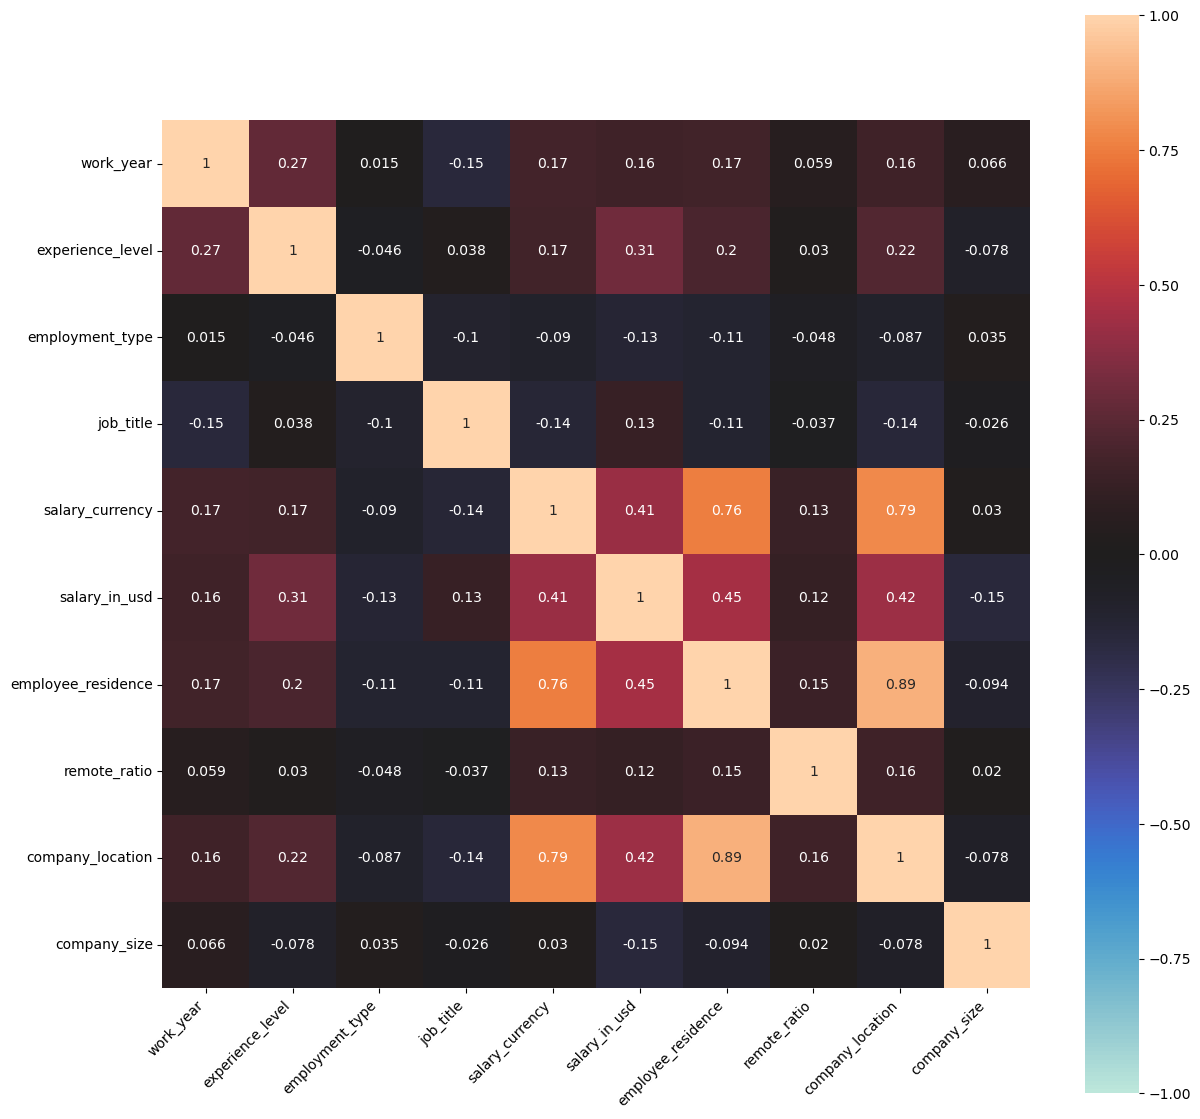

In [46]:
#It is also important to use "heatmap" to ascertain the correlation between the encoded columns
corr=df.corr()
plt.figure(figsize=(14, 14))
ax = sb.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, annot = True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')
corr

Correlation is a statistical measure that shows how two variables are related. 

It ranges from -1 to 1, where -1 represents a perfect negative correlation, 0 represents no correlation, and 1 represents a perfect positive correlation. 

The correlation coefficient can provide useful insights into the strength and direction of the relationship between two variables.

From the heatmap, the suggested correlated columns are:'employee residence','company location'.'experience level','work year','job title','remote ratio'. 

Though these correlations are not visibly high.

## FEATURE SELECTION

  Here, we selecting the features(x) and the label(y).
X been the features we would like to use in predicting, while Y is the label contains variable we want to predict.

The selected feature(x) and label(y) are listed below:

In [225]:
x=df[['experience_level','company_location','employee_residence','work_year','remote_ratio','job_title','salary_currency']]
y=df[['salary_in_usd']]

In [145]:
#Before building the model the model,we have to sure that the feature and label have the same shape as represented below
x.shape

(565, 6)

In [146]:
y.shape

(565, 1)

# 1: MODEL BUILDING---Multiply linear Regression

In [147]:
# Create a linear Regressor model
lr_model=LinearRegression()

In [153]:
# Spliting the dataset to a train and test varriable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [154]:
#Train the model to fit the divided varriables
lr_model= LinearRegression().fit(x_train, y_train)
lr_model

LinearRegression()

#### It is importent to split the data_set into train and test,which will be used to evaluate the model.
    Because of the size and volumn of the dataset,it will divided into 80/20

The LinearRegression model is used fit the training data (X_train and y_train) using the fit() method.
The model learns the coefficients (weights) for the linear regression equation that best fits the training data.


In [155]:
#To retrieve the coefficients (slopes) of the linear regression model
print('model coefficients is:',lr_model.coef_)

model coefficients is: [[0.16348626 0.00674747 0.01657781 0.14253787 0.05728994 0.01626613]]


In [156]:
#To retrieve the intercept of the linear regression model.
print('model intercept is:',lr_model.intercept_)

model intercept is: [-289.69695557]


### Model Evaluation

In [157]:
# Evaluate the model using the test data
predictions = lr_model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("Mean squared error:", mse)
rmse = np.sqrt(mse)
print("Root mean squared error:", rmse)
r2 = r2_score(y_test, predictions) #How good is the prediction?
print("R2_score:", r2)

Mean squared error: 0.6237302623559563
Root mean squared error: 0.7897659541636094
R2_score: 0.3228552650666471


From the above code, we evaluating the performance of the linear regression model using various regression metrics.

'Mean squared error(MSE)'  MSE measures the average squared difference between the predicted values and the actual values.

'Root mean squared error(RMSE)'= It represents the average deviation of the predicted values from the actual values in the original units of the target variable.

'R2_score(r2)' = R-squared measures the proportion of the variance in the target variable that is explained by the model. It ranges from 0 to 1, where higher values indicate better model fit to the data

#### The r2score value is 0.32, that is the model pridiction is about 32% correct, this value might be low but considering that our problem is NON-LINEAR REGRESSION, it gives room to evaluate other models.

We would also want to evaluate our model with the training set,

In [158]:
#evaluate the model on the traning data
r2_score_training = r2_score(y_train,lr_model.predict(x_train))
r2_score_training

0.27718862305381275

In [159]:
#We also went ahead to transform out "X" with ploynomial features, in other to compare outputs

from sklearn.preprocessing import PolynomialFeatures #To imported the polynomial features

poly_features = PolynomialFeatures(degree=2)

# Transform the features
X_poly = poly_features.fit_transform(x)

# Train the linear regression model on the transformed features
lr_model.fit(X_poly, y)

# Make predictions on the transformed test data
y_pred = lr_model.predict(poly_features.transform(x_test))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared score:", r2)

Mean squared error: 0.4729297844766243
R-squared score: 0.4865698638031566


AFter we tried to transform the features with polynomial, the output of the r2score is relatively higher

# 2: MODEL BUILDING---Random Forest Regression
 Randon Forest regression model will be deployed

In [182]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [183]:
#Train the model to fit the divided varriables
rf_model= RandomForestRegressor().fit(x_train, y_train)
rf_model

RandomForestRegressor()

In [187]:
# Predict on the test data
predictions = rf_model.predict(x_test)

# 4. Evaluate the model performance
mse = mean_squared_error(y_test, predictions)
print("Mean squared error:", mse)
rmse = np.sqrt(mse)
print("Root mean squared error:", rmse)
r2 = r2_score(y_test, predictions) #How good is the prediction?
print("R2_score:", r2)

Mean squared error: 0.6056380443845114
Root mean squared error: 0.7782275016886202
R2_score: 0.34249684874795805


Using the Randon Forest Regression with different metrics, the outcome of the result(r2score) is relatively the same with the linear-regression model

In [188]:
 #evaluate the model on the traning data/how well it predicts training set
r2_score_training = r2_score(y_train,rf_model.predict(x_train))
r2_score_training

0.8273005104966

But for the Train set with Randon Forest, model is seen to predict correctly.

# 3: MODEL BUILDING---Gradient Boosting Regressor

In [243]:
# Initialize the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.2,random_state=42)

#Fit the model to the training data
gb_model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [244]:
# Predict on the test data
predictions = gb_model.predict(x_test)

# 4. Evaluate the model performance
mse = mean_squared_error(y_test, predictions)
print("Mean squared error:", mse)
rmse = np.sqrt(mse)
print("Root mean squared error:", rmse)
r2 = r2_score(y_test, predictions) #How good is the prediction?
print("R2_score:", r2)

Mean squared error: 0.5543476927312417
Root mean squared error: 0.7445452925989404
R2_score: 0.39817955916143977


Using the Gradient Boosting Regressor, the outcome of the result(r2score) is aprroximately '0.40', relatively the same with that of Polynomial.. Sugessting that our models output is colse to each other and predicting well.

In [245]:
#evaluate the model on the traning data/how well it predicts training set
r2_score_training = r2_score(y_train,gb_model.predict(x_train))
r2_score_training

0.761758851545527

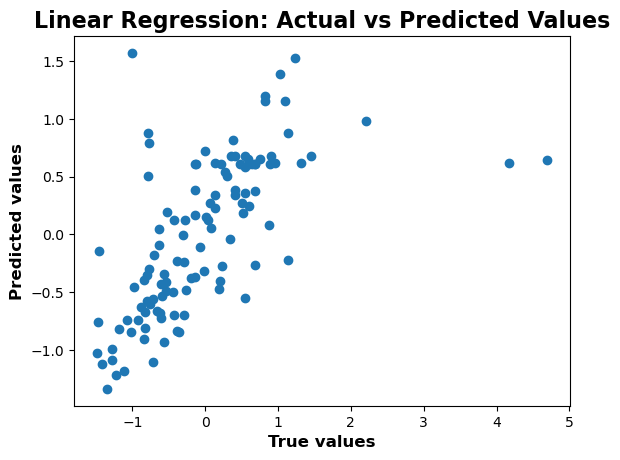

In [246]:
# 5. Visualize the results
plt.scatter(y_test, predictions)
plt.title('Linear Regression: Actual vs Predicted Values', fontsize=16,fontweight='bold')
plt.xlabel("True values",fontsize=12, fontweight='bold')
plt.ylabel("Predicted values",fontsize=12, fontweight='bold')
plt.show()

#### Points To Note From The Plotted Value

The scatter plot of the actual and predicted values shows that the model is able to predict the values with a high degree of accuracy despite the r2 score of 0:36. 

Each point on the plot represents a single data point, with the x-axis showing the actual salary and the y-axis showing the predicted salary.

The majority of the data points are clustered around the line of best fit, indicating that the model is able to capture the relationship between the input and output variables. 

The plot can be used to identify potential outliers or influential points that may be affecting the model's performance,(despite scalling the features). For example, points that are far from the line of best fit may be outliers that need to be investigated further.

Overall, the scatter plot provides a useful visual representation of the model's performance and can be used to gain insights into the accuracy and limitations of the model.
However, overall, the model is able to provide a good estimate of the output values.

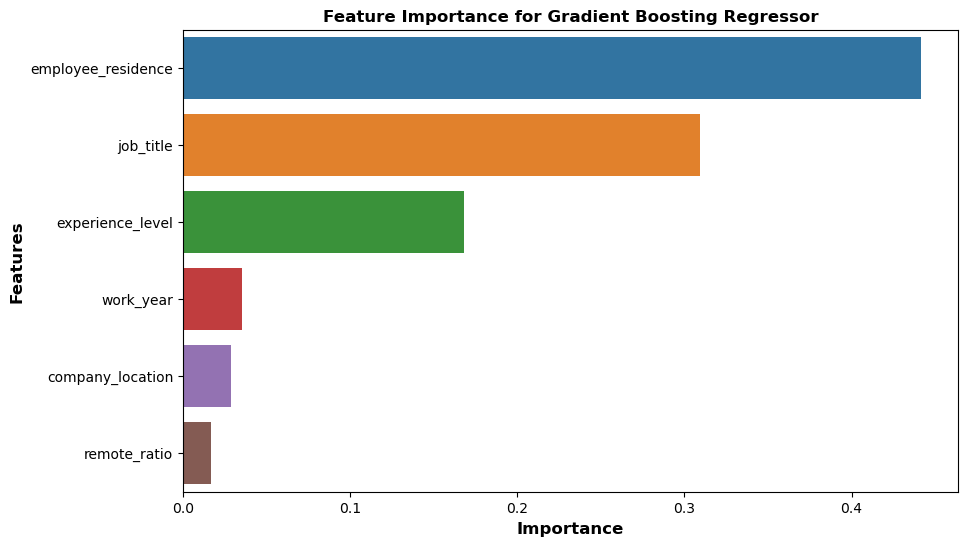

In [247]:
#To vizuale the feature importance used for the analysis
importances = gb_model.feature_importances_
features = x_train.columns

# Create a dataframe with feature importance
importance_df = pd.DataFrame({'feature': features, 'importance': importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values('importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sb.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importance for Gradient Boosting Regressor',fontsize=12, fontweight='bold')
plt.xlabel("Importance",fontsize=12, fontweight='bold')
plt.ylabel('Features',fontsize=12, fontweight='bold')
plt.show()

From the above, it is visible that the selected feature importance are:(asc),'employee residence','job title','experience level','work year','company location','remote ratio'

# MODEL OBSERVATION AND CONCLUSION
#### 📋After rigorous experimentation with different models,and understang that the problem is that of a NON-LINEAR REGRESSION. 

#### It's clear that the POLYNOMIAL FEATURE and **GRADIENT BOOSTING REGRESSOR** outperforms the other tested models with an impressive **ACCURACY SCORE OF 0.48** and 0.40 respectively.

####  However, it's essential to keep in mind that model selection is not an exact science, and it's always a good practice to try out various models and compare their results.

####  Nonetheless, for this analysis, the ensemble of **Logistic Regression,Polynomial Features, RandomForest, and Gradient Boosting Regressor provides a comprehensive and robust approach to predicting salary trends.**

In [248]:
# Use joblib to save the analysed dataset and pricted model for further use/deployment

import joblib

# Save the model as a joblib file
filename = 'Data_Science_Salary_analysed.joblib'
joblib.dump(rf_model, filename)

['Data_Science_Salary_analysed.joblib']

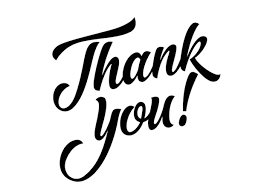